In [1]:
import util
import search

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


### Simulate Image

In [2]:
import sys
sys.path.insert(1, '/Users/bcostagomes/Documents/Code/vne')
import vne

In [3]:
vne.simulate.set_default_font()
img, bboxes, labels = vne.simulate.create_heterogeneous_image((1024, 1024), n_objects=100)

from vne.special.ctf import contrast_transfer_function, convolve_with_ctf

ctf = contrast_transfer_function(
    defocus=5e3,
    box_size=1024,
)


def preprocessor(x):
    x_ctf = convolve_with_ctf(
        (1+x),
        ctf,
        add_poisson_noise=False,
    )
    x_noise = x_ctf + np.random.randn(*x.shape)*40
    return x_noise

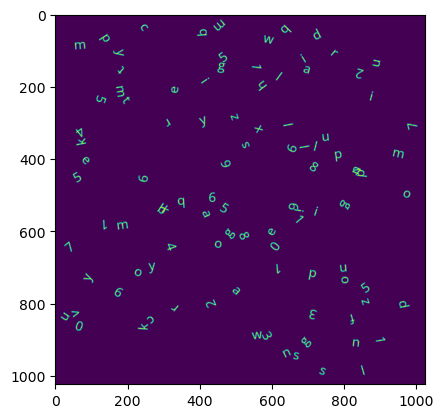

In [4]:
plt.imshow(img)

### Make the graph from the positions in the image

The features, in this case, are the images within the bounding boxes.

In [5]:
points = []
features = []
for bbox in bboxes:
    corner = [bbox[0], bbox[1]] 
    height = bbox[3] - bbox[1]
    width = bbox[2] - bbox[0]
    points.append([round(bbox[0]+height/2), round(bbox[1]+width/2)])
    features.append(img[bbox[0]:bbox[2], bbox[1]:bbox[3]])

In [6]:
nodes = util.make_nodes_from_points(points, features)

In [7]:
G, pos = util.make_graph(nodes)

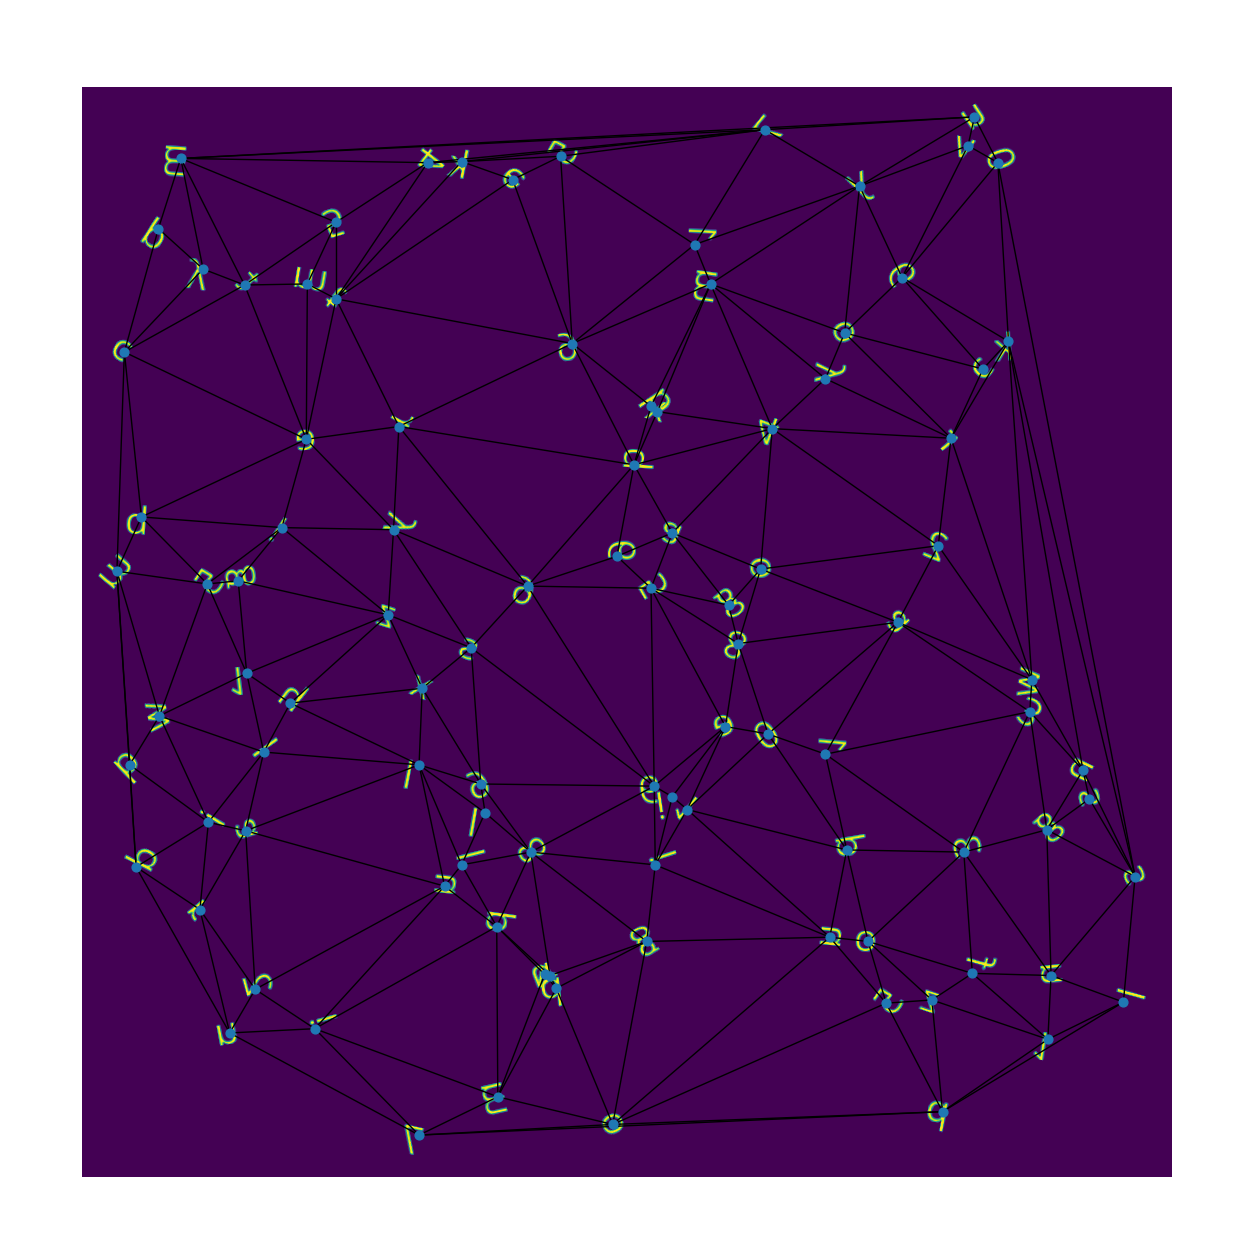

In [9]:
plt.figure(figsize=(16,16))
plt.imshow(img.T)
nx.draw(G,pos, node_size=40, with_labels = False)